# 宏观经济学

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Arial Unicode MS'
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

In [2]:
df = pd.read_excel('bop.xlsx', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,中国国际收支平衡表（年度表）,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,单位:亿元人民币,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,项目,2010,2011,2012,2013,2014,2015,2016,2017.0,2018.0,2019.0,2020.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
139,2. 根据《国际收支和国际投资头寸手册》（第六版）编制，资本和金融账户中包含储备资产。,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140,3.“贷方”按正值列示，“借方”按负值列示，差额等于“贷方”加上“借方”。本表除标注“贷方”...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141,4. 金融账户下，对外金融资产的净增加用负值列示，净减少用正值列示。对外负债的净增加用正值列...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142,5. 年度人民币计值的国际收支平衡表由单季人民币计值数据累加得到。季度人民币计值的国际收支平...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.loc[4:5]

,0,1,2,3,4,5,6,7,8,9,10,11
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1. 经常账户,16043.3,8735.74,13601.9,9190.29,14516,18265.7,12637.8,12684.59029,1881.742404,7115.964257,18708.632951


In [4]:
def getDf(ids):
    data = {}
    for n in ids:
        data[df.loc[n, 0:1].values[0]] = df.loc[n, 1:12].values
    return pd.DataFrame(data, index=df.loc[3, 1:12].values)
bop = getDf([5, 74, 135])
bop

,1. 经常账户,2. 资本和金融账户,3.净误差与遗漏
2010.0,16043.3,-12488,-3555.24
2011.0,8735.74,-7893.44,-842.296
2012.0,13601.9,-8106.6,-5495.31
2013.0,9190.29,-5331.43,-3858.87
2014.0,14516,-10393.8,-4122.18
2015.0,18265.7,-5652.62,-12613.1
2016.0,12637.8,1950.86,-14588.6
2017.0,12684.6,1211.84,-13896.4
2018.0,1881.74,9901.17,-11782.9
2019.0,7115.96,1799.89,-8915.86


<AxesSubplot:>

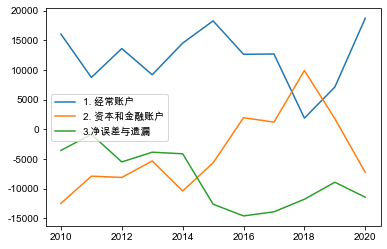

In [5]:
bop.plot()

# 时间序列分析

/Users/thales/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([ 1.        ,  0.00426245, -0.27289365, -0.28428044, -0.25180558])

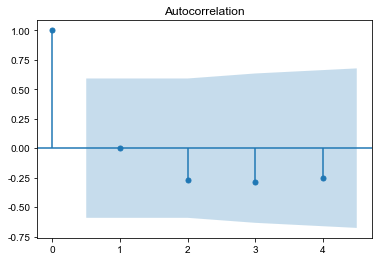

In [6]:
from statsmodels.graphics import tsaplots
from statsmodels.tsa import stattools
fig, ax = plt.subplots()
tsaplots.plot_acf(bop["1. 经常账户"], lags=4, ax=ax) # 自相关性画图120阶
stattools.acf(bop["1. 经常账户"], nlags=4)

array([ 1.        ,  0.00468869, -0.333566  , -0.43572626, -0.77552683])

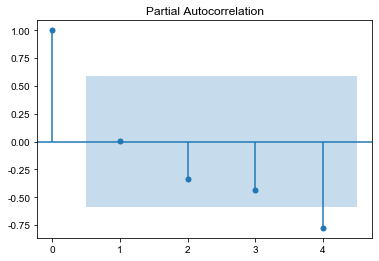

In [7]:
fig, ax = plt.subplots()
tsaplots.plot_pacf(bop["1. 经常账户"], lags=4, ax=ax) # 偏自相关性画图120阶
stattools.pacf(bop["1. 经常账户"], nlags=4)